# Deep Learning with PyTorch



## Tensors 

A tensor is a multi-dimensional array in Deep Learning.

A tensor in mathematics is a mapping between vector spaces which might be represented as a multi-dimensional array in some cases. 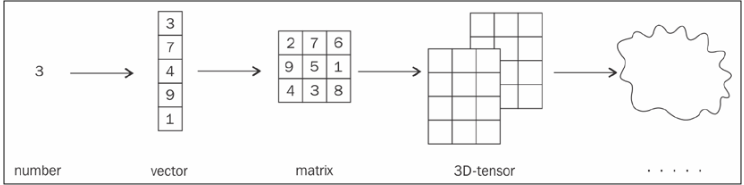

In [2]:
import torch
import numpy as np

In [3]:
a = torch.FloatTensor(3,2) 
a

tensor([[7.1816e-36, 0.0000e+00],
        [3.7835e-44, 0.0000e+00],
        [       nan, 0.0000e+00]])

In [4]:
a.zero_()

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])

Inplace operations on Tensors have two types:

1. Inplace operations which have the _ appended to their name which returns the object itself 

2. Functional operations creates a copy of the tensor with the performed modification

You can also create tensors by providing a list or tuple of values

In [5]:
torch.FloatTensor([[1,2,3], [3,2,1]])

tensor([[1., 2., 3.],
        [3., 2., 1.]])

## GPU tensors

PyTorch transparently supports CUDA GPUs which means that all operations have two versions which are the CPU and the GPU with the decision to use either one being selected automatically.

torch.FloatTensor is a 32-bit float that resides in the CPU memory, but torch.cuda.FloatTensor is the GPU equivalent. 

You can convert tensors from the CPU to the GPU using the *to()* operation 

In [6]:
# This throws an error as the current runtime does not have access to a GPU
b = torch.FloatTensor([2,3])
ba = b.to('cuda')
ba

RuntimeError: ignored

## Tensors and gradients

PyTorch has a built-in gradient calculation and tracking machinery.

*grad* - holds a tensor of the smae shape containing computed gradients. 

*is_leaf* -  If the tensor was constructed by the user and false if the object is a result of function transformation.

*requires_grad* - True if the tensor requires gradients to be calculated. 

In [8]:
v1 = torch.tensor([1.0,1.0], requires_grad=True)
v2 = torch.tensor([2.0,2.0])

In [9]:
v_sum = v1 + v2
v_res = (v_sum * 2).sum()
v_res

tensor(12., grad_fn=<SumBackward0>)

In [10]:
# Both the tensors were created by the user
v1.is_leaf, v2.is_leaf

(True, True)

In [11]:
# The resulting tensor was the result of a function transformation
v_sum.is_leaf, v_res.is_leaf

(False, False)

In [12]:
v1.requires_grad, v2.requires_grad

(True, False)

In [13]:
v_res.requires_grad, v_sum.requires_grad

(True, True)

In [15]:
# backward() is used to calculate the numerical derivative of the v_res variable w.r.t to any variable that our graph has
# We are trying to answer the question "What influence do small chanmges to the v_res varibale have on the resst of the graph"
# Here it shows that by increasing any element of v1 by one, the resulting value of v_res will grow by two
v_res.backward()
v1.grad

tensor([2., 2.])

In [17]:
# PyTorch only calculates the gradients for values with the requires_grad = True 
# This does not return anything
v2.grad

## Neural Network Building Blocks 



In [18]:
import torch.nn as nn

In [19]:
l = nn.Linear(2,5)

In [20]:
v = torch.FloatTensor([1,2])

In [21]:
l(v)

tensor([-1.0552,  0.6767,  0.0524, -0.4562, -0.3740], grad_fn=<AddBackward0>)

In the example above we created a randomly intialized feed-forward layer, with two inputs and five outputs and applied it to our float tensor.

In [23]:
s = nn.Sequential(
    nn.Linear(2,5),
    nn.ReLU(),
    nn.Linear(5,20),
    nn.Linear(20,10),
    nn.Dropout(p=0.3),
    nn.Softmax(dim=1)
)

In [24]:
s

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=20, bias=True)
  (3): Linear(in_features=20, out_features=10, bias=True)
  (4): Dropout(p=0.3, inplace=False)
  (5): Softmax(dim=1)
)

In [26]:
s(torch.FloatTensor([[1,2]]))

tensor([[0.0895, 0.0627, 0.0990, 0.1170, 0.0712, 0.1736, 0.0994, 0.0703, 0.1004,
         0.1170]], grad_fn=<SoftmaxBackward>)

He we defined a three-layer NN with softmax on output, applied along dimension 1, ReLu nonlinearities and dropout